<a href="https://colab.research.google.com/github/mifta10/Explring_wealth_accumulation_of_billionaires/blob/main/Billionaires_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Import and Necessary Libraries**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px



In [6]:
billionaire_df = pd.read_csv('/content/billionaires.csv')
billionaire_df.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


**Data Preprocessing**

In [7]:
billionaire_df.shape

(2614, 22)

In [8]:
billionaire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company.founded           2614 non-null   int64  
 4   company.name              2576 non-null   object 
 5   company.relationship      2568 non-null   object 
 6   company.sector            2591 non-null   object 
 7   company.type              2578 non-null   object 
 8   demographics.age          2614 non-null   int64  
 9   demographics.gender       2580 non-null   object 
 10  location.citizenship      2614 non-null   object 
 11  location.country code     2614 non-null   object 
 12  location.gdp              2614 non-null   float64
 13  location.region           2614 non-null   object 
 14  wealth.t

In [9]:
billionaire_df.describe()

,rank,year,company.founded,demographics.age,location.gdp,wealth.worth in billions
count,2614.000000,2614.000000,2614.000000,2614.000000,2.614000e+03,2614.000000
mean,599.672533,2008.411630,1924.711936,53.341239,1.769103e+12,3.531943
std,467.885695,7.483598,243.776546,25.333320,3.547083e+12,5.088813
min,1.000000,1996.000000,0.000000,-42.000000,0.000000e+00,1.000000
25%,215.000000,2001.000000,1936.000000,47.000000,0.000000e+00,1.400000
50%,430.000000,2014.000000,1963.000000,59.000000,0.000000e+00,2.000000
75%,988.000000,2014.000000,1985.000000,70.000000,7.250000e+11,3.500000
max,1565.000000,2014.000000,2012.000000,98.000000,1.060000e+13,76.000000


In [10]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
billionaire_df.nunique()

name                        2077
rank                         468
year                           3
company.founded              178
company.name                1577
company.relationship          74
company.sector               520
company.type                  18
demographics.age              76
demographics.gender            3
location.citizenship          73
location.country code         74
location.gdp                  81
location.region                8
wealth.type                    5
wealth.worth in billions     183
wealth.how.category            9
wealth.how.from emerging       1
wealth.how.industry           19
wealth.how.inherited           6
wealth.how.was founder         1
wealth.how.was political       1
dtype: int64

In [11]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

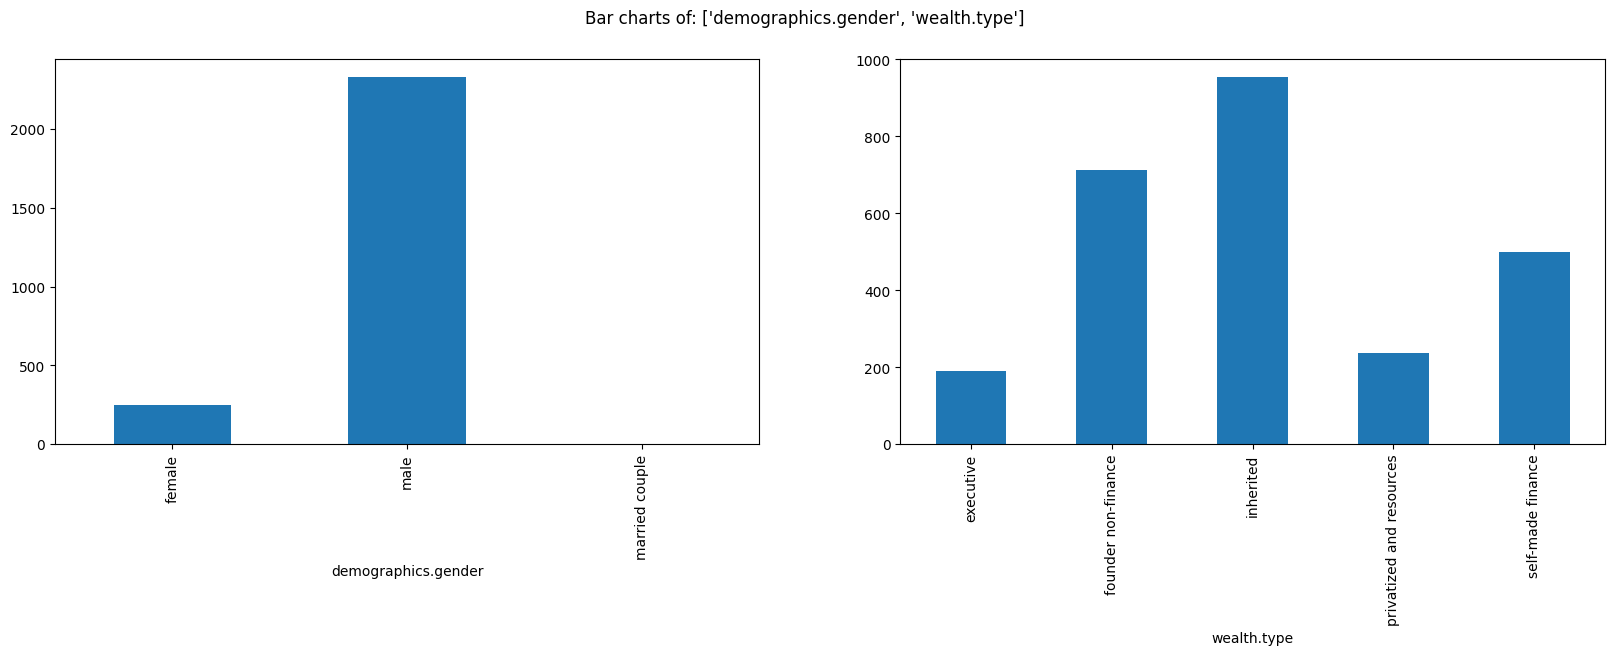

In [12]:

# Calling the function
PlotBarCharts(inpData=billionaire_df, colsToPlot=['demographics.gender', 'wealth.type'])

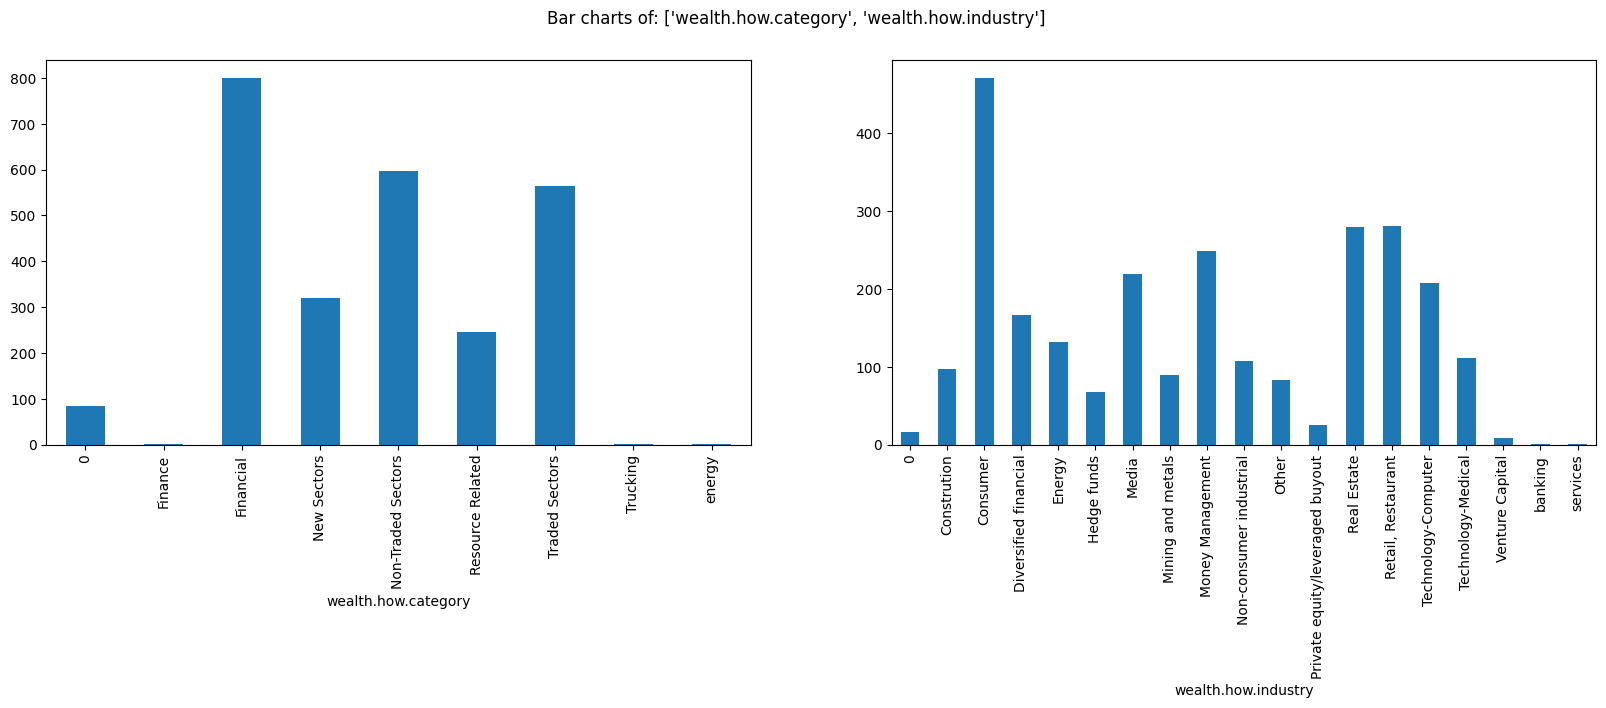

In [13]:

# Calling the function
PlotBarCharts(inpData=billionaire_df, colsToPlot=['wealth.how.category','wealth.how.industry'])
#'wealth.how.inherited','wealth.how.was founder'

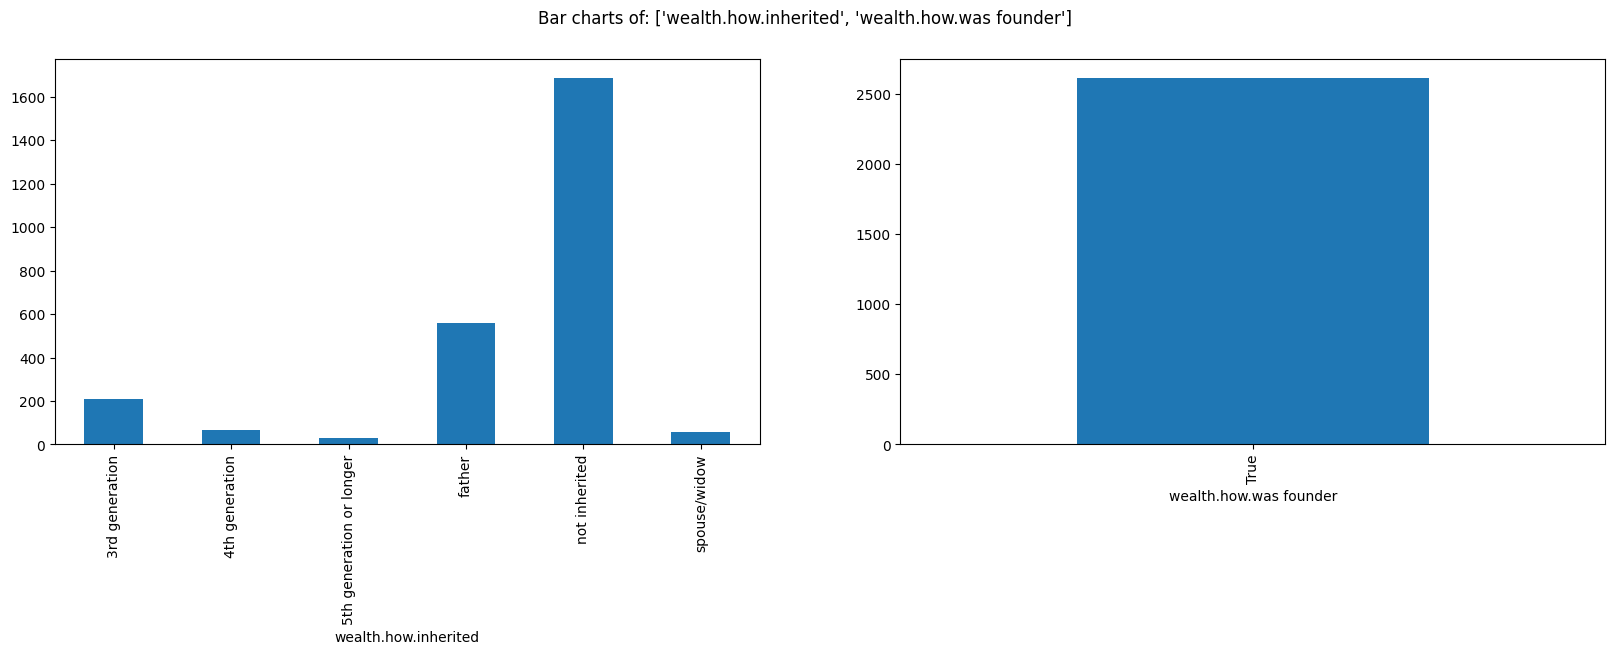

In [14]:

# Calling the function
PlotBarCharts(inpData=billionaire_df, colsToPlot=['wealth.how.inherited','wealth.how.was founder'])

array([[<Axes: title={'center': 'wealth.worth in billions'}>,
        <Axes: title={'center': 'demographics.age'}>]], dtype=object)

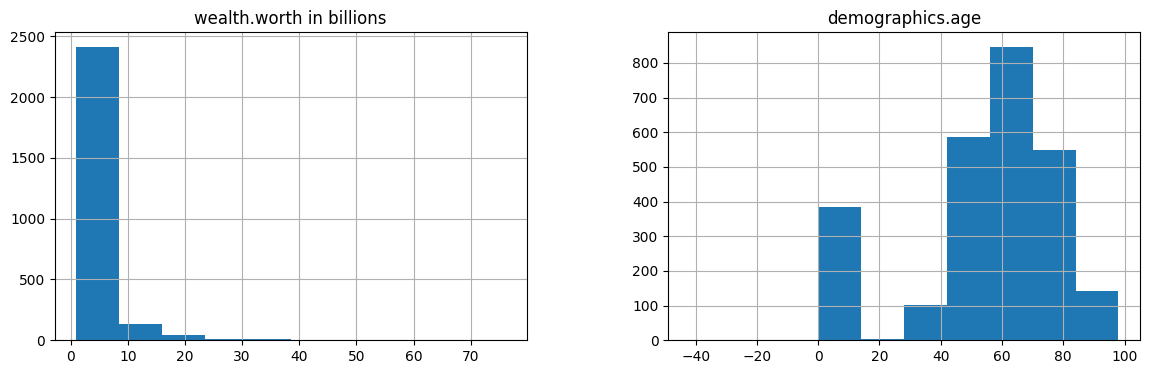

In [15]:
# Plotting histograms of multiple columns together
billionaire_df.hist(['wealth.worth in billions', 'demographics.age'], figsize=(14,4))

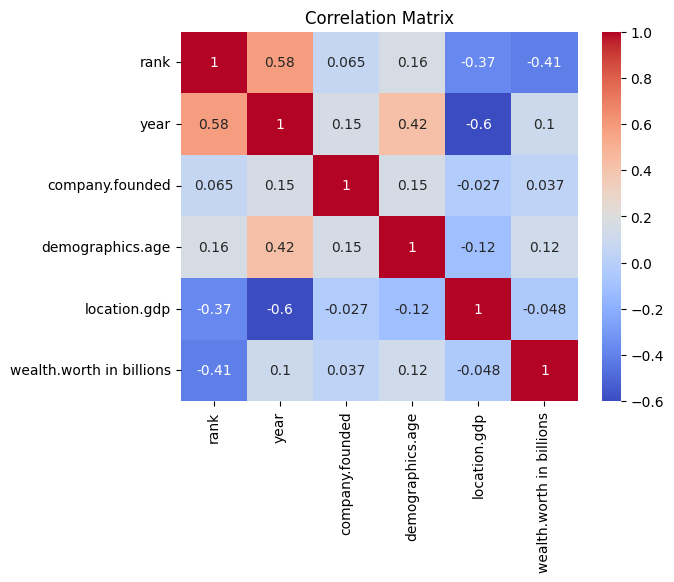

In [16]:
# select only numerical columns
num_cols = ['rank','year','company.founded', 'demographics.age', 'location.gdp', 'wealth.worth in billions']
df_num = billionaire_df[num_cols]

# calculate the correlation matrix
corr_matrix = df_num.corr()

# print the correlation matrix
#print("Correlation matrix:")
#print(corr_matrix)
# plot heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()

In [17]:
#2.Drop any columns that are not relevant to the questions we want to answer. In this case, we only need the following columns to answer the questions:
#demographics.gender, location.country code, company.sector, and wealth.worth in billions.
billionaire_df = billionaire_df[['name','demographics.gender', 'location.citizenship',
                                 'company.sector','demographics.age', 'wealth.worth in billions',
                                 'wealth.type','wealth.how.category','wealth.how.inherited','wealth.how.was founder']]
billionaire_df

,name,demographics.gender,location.citizenship,company.sector,demographics.age,wealth.worth in billions,wealth.type,wealth.how.category,wealth.how.inherited,wealth.how.was founder
0,Bill Gates,male,United States,Software,40,18.5,founder non-finance,New Sectors,not inherited,True
1,Bill Gates,male,United States,Software,45,58.7,founder non-finance,New Sectors,not inherited,True
2,Bill Gates,male,United States,Software,58,76.0,founder non-finance,New Sectors,not inherited,True
3,Warren Buffett,male,United States,Finance,65,15.0,founder non-finance,Traded Sectors,not inherited,True
4,Warren Buffett,male,United States,Finance,70,32.3,founder non-finance,Traded Sectors,not inherited,True
...,...,...,...,...,...,...,...,...,...,...
2609,Wu Chung-Yi,male,Taiwan,beverages and food,55,1.0,executive,Traded Sectors,not inherited,True
2610,Wu Xiong,male,China,infant formula,0,1.0,executive,Traded Sectors,not inherited,True
2611,Yang Keng,male,China,real estate,53,1.0,self-made finance,Financial,not inherited,True
2612,Zdenek Bakala,male,Czech Republic,coal,53,1.0,privatized and resources,Resource Related,not inherited,True


In [18]:
#3.Renaming Columns for better understanding

# Rename columns
billionaire_df = billionaire_df.rename(columns={
                        'company.sector': 'company_sector',
                        'company.type': 'company_type',
                        'demographics.age': 'age',
                        'demographics.gender': 'gender',
                        'location.citizenship': 'citizenship',
                        'wealth.type': 'wealth_type',
                        'wealth.worth in billions': 'net_worth_billion',
                        'wealth.how.category': 'wealth_source',
                        'wealth.how.inherited': 'wealth_inherited',
                        'wealth.how.was founder': 'was_founder'})

#print(billionaire_df.columns)
billionaire_df

,name,gender,citizenship,company_sector,age,net_worth_billion,wealth_type,wealth_source,wealth_inherited,was_founder
0,Bill Gates,male,United States,Software,40,18.5,founder non-finance,New Sectors,not inherited,True
1,Bill Gates,male,United States,Software,45,58.7,founder non-finance,New Sectors,not inherited,True
2,Bill Gates,male,United States,Software,58,76.0,founder non-finance,New Sectors,not inherited,True
3,Warren Buffett,male,United States,Finance,65,15.0,founder non-finance,Traded Sectors,not inherited,True
4,Warren Buffett,male,United States,Finance,70,32.3,founder non-finance,Traded Sectors,not inherited,True
...,...,...,...,...,...,...,...,...,...,...
2609,Wu Chung-Yi,male,Taiwan,beverages and food,55,1.0,executive,Traded Sectors,not inherited,True
2610,Wu Xiong,male,China,infant formula,0,1.0,executive,Traded Sectors,not inherited,True
2611,Yang Keng,male,China,real estate,53,1.0,self-made finance,Financial,not inherited,True
2612,Zdenek Bakala,male,Czech Republic,coal,53,1.0,privatized and resources,Resource Related,not inherited,True


In [19]:
#1.Checking missing values dataset
print(billionaire_df.isnull().sum())

name                  0
gender               34
citizenship           0
company_sector       23
age                   0
net_worth_billion     0
wealth_type          22
wealth_source         1
wealth_inherited      0
was_founder           0
dtype: int64


In [20]:
# get the number of missing data points per column
missing_values_count = billionaire_df.isnull().sum()
# how many total missing values do we have?
total_cells = np.product(billionaire_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.306044376434583

In [21]:
#1.1.Checking Missing values for updated Dataframe
print(billionaire_df.isnull().sum())

name                  0
gender               34
citizenship           0
company_sector       23
age                   0
net_worth_billion     0
wealth_type          22
wealth_source         1
wealth_inherited      0
was_founder           0
dtype: int64


In [22]:
# Calculate the percentage of missing values in each column for updated dataframe
missing_values = billionaire_df.isnull().sum() / len(billionaire_df) * 100

# Print the percentage of missing values in each column
print(missing_values)

name                 0.000000
gender               1.300689
citizenship          0.000000
company_sector       0.879878
age                  0.000000
net_worth_billion    0.000000
wealth_type          0.841622
wealth_source        0.038256
wealth_inherited     0.000000
was_founder          0.000000
dtype: float64


In [23]:
billionaire_df.isnull().sum()

name                  0
gender               34
citizenship           0
company_sector       23
age                   0
net_worth_billion     0
wealth_type          22
wealth_source         1
wealth_inherited      0
was_founder           0
dtype: int64

In [24]:
# here we can see the the column gender has missing gender because most of the billionaire
# name is included family .In data set only 1.3% of rows missing gender.
#and most of those are family business
# and missing data percentage is very less so we can delete those rows
missing_gender_df = billionaire_df[billionaire_df['gender'].isnull()]

names = missing_gender_df.loc[:, 'name']

for name in names:
    print(name)

Oeri Hoffman and Sacher
Haniel family
Wonowidjojo family
Merck family
Henkel family
Boehringer family
Seydoux/Schlumberger families
Brenninkmeijer family
Shin Kyuk-Ho
Lemos family
Von Siemens family
Porsche family
Funke family
Verspieren family
Moores family
Goulandris family
Rochling family
Peugeot family
Simon family
Freudenberg family
Juffali family
Leibbrand family
Reimann family
Conle famle
Bemberg family
Isono family
Ryusuke Kimura
Kim Suk-won
Larragoiti family
Strwher family
Werhahn family
Otani Family
Junichi Murata
Autrey family


In [25]:
# Replace missing gender values with 'Unknown' for the name 'John'
billionaire_df.loc[billionaire_df['name'] == 'Oeri Hoffman and Sacher', 'gender'] = billionaire_df.loc[billionaire_df['name'] == 'Oeri Hoffman and Sacher', 'gender'].fillna('married couple')

In [26]:
billionaire_df.head(10)

,name,gender,citizenship,company_sector,age,net_worth_billion,wealth_type,wealth_source,wealth_inherited,was_founder
0,Bill Gates,male,United States,Software,40,18.5,founder non-finance,New Sectors,not inherited,True
1,Bill Gates,male,United States,Software,45,58.7,founder non-finance,New Sectors,not inherited,True
2,Bill Gates,male,United States,Software,58,76.0,founder non-finance,New Sectors,not inherited,True
3,Warren Buffett,male,United States,Finance,65,15.0,founder non-finance,Traded Sectors,not inherited,True
4,Warren Buffett,male,United States,Finance,70,32.3,founder non-finance,Traded Sectors,not inherited,True
5,Carlos Slim Helu,male,Mexico,Communications,74,72.0,privatized and resources,Non-Traded Sectors,not inherited,True
6,Oeri Hoffman and Sacher,married couple,Switzerland,pharmaceuticals,0,13.1,inherited,New Sectors,3rd generation,True
7,Paul Allen,male,United States,technology,48,30.4,founder non-finance,New Sectors,not inherited,True
8,Amancio Ortega,male,Spain,Fashion,77,64.0,founder non-finance,Non-Traded Sectors,not inherited,True
9,Lee Shau Kee,male,Hong Kong,real estate,68,12.7,self-made finance,Financial,not inherited,True


In [27]:
#1.1.Checking Missing values for updated Dataframe
print(billionaire_df.isnull().sum())

name                  0
gender               33
citizenship           0
company_sector       23
age                   0
net_worth_billion     0
wealth_type          22
wealth_source         1
wealth_inherited      0
was_founder           0
dtype: int64


In [28]:
#It is not possible to determine the gender of individuals based solely on their name or family name.
billionaire_df = billionaire_df.dropna(subset=['gender'])
billionaire_df

,name,gender,citizenship,company_sector,age,net_worth_billion,wealth_type,wealth_source,wealth_inherited,was_founder
0,Bill Gates,male,United States,Software,40,18.5,founder non-finance,New Sectors,not inherited,True
1,Bill Gates,male,United States,Software,45,58.7,founder non-finance,New Sectors,not inherited,True
2,Bill Gates,male,United States,Software,58,76.0,founder non-finance,New Sectors,not inherited,True
3,Warren Buffett,male,United States,Finance,65,15.0,founder non-finance,Traded Sectors,not inherited,True
4,Warren Buffett,male,United States,Finance,70,32.3,founder non-finance,Traded Sectors,not inherited,True
...,...,...,...,...,...,...,...,...,...,...
2609,Wu Chung-Yi,male,Taiwan,beverages and food,55,1.0,executive,Traded Sectors,not inherited,True
2610,Wu Xiong,male,China,infant formula,0,1.0,executive,Traded Sectors,not inherited,True
2611,Yang Keng,male,China,real estate,53,1.0,self-made finance,Financial,not inherited,True
2612,Zdenek Bakala,male,Czech Republic,coal,53,1.0,privatized and resources,Resource Related,not inherited,True


In [29]:
#1.2.Checking Missing values for updated Dataframe
print(billionaire_df.isnull().sum())

name                  0
gender                0
citizenship           0
company_sector       11
age                   0
net_worth_billion     0
wealth_type          10
wealth_source         1
wealth_inherited      0
was_founder           0
dtype: int64


In [30]:
#I am treating missing values with Median for Continuous values, and Mode for categorical values.
# Treating missing values of categorical variable with MODE value
billionaire_df['company_sector'].fillna(value=billionaire_df['company_sector'].mode()[0], inplace=True)
billionaire_df['wealth_type'].fillna(value=billionaire_df['wealth_type'].mode()[0], inplace=True)
billionaire_df['wealth_source'].fillna(value=billionaire_df['wealth_source'].mode()[0], inplace=True)
billionaire_df

<ipython-input-30-d863120c5587>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billionaire_df['company_sector'].fillna(value=billionaire_df['company_sector'].mode()[0], inplace=True)
<ipython-input-30-d863120c5587>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billionaire_df['wealth_type'].fillna(value=billionaire_df['wealth_type'].mode()[0], inplace=True)
<ipython-input-30-d863120c5587>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

,name,gender,citizenship,company_sector,age,net_worth_billion,wealth_type,wealth_source,wealth_inherited,was_founder
0,Bill Gates,male,United States,Software,40,18.5,founder non-finance,New Sectors,not inherited,True
1,Bill Gates,male,United States,Software,45,58.7,founder non-finance,New Sectors,not inherited,True
2,Bill Gates,male,United States,Software,58,76.0,founder non-finance,New Sectors,not inherited,True
3,Warren Buffett,male,United States,Finance,65,15.0,founder non-finance,Traded Sectors,not inherited,True
4,Warren Buffett,male,United States,Finance,70,32.3,founder non-finance,Traded Sectors,not inherited,True
...,...,...,...,...,...,...,...,...,...,...
2609,Wu Chung-Yi,male,Taiwan,beverages and food,55,1.0,executive,Traded Sectors,not inherited,True
2610,Wu Xiong,male,China,infant formula,0,1.0,executive,Traded Sectors,not inherited,True
2611,Yang Keng,male,China,real estate,53,1.0,self-made finance,Financial,not inherited,True
2612,Zdenek Bakala,male,Czech Republic,coal,53,1.0,privatized and resources,Resource Related,not inherited,True


In [31]:
#1.3.Checking Missing values for updated Dataframe
print(billionaire_df.isnull().sum())

name                 0
gender               0
citizenship          0
company_sector       0
age                  0
net_worth_billion    0
wealth_type          0
wealth_source        0
wealth_inherited     0
was_founder          0
dtype: int64


In [32]:
#4.Checking for duplicated rows in a dataset after dropping the rows with missing values
# Check for duplicated rows
duplicated_rows = billionaire_df[billionaire_df.duplicated()]

# Print the duplicated rows
print(duplicated_rows)

Empty DataFrame
Columns: [name, gender, citizenship, company_sector, age, net_worth_billion, wealth_type, wealth_source, wealth_inherited, was_founder]
Index: []


In [33]:
#No duplicated rows in the dataframe
billionaire_df

,name,gender,citizenship,company_sector,age,net_worth_billion,wealth_type,wealth_source,wealth_inherited,was_founder
0,Bill Gates,male,United States,Software,40,18.5,founder non-finance,New Sectors,not inherited,True
1,Bill Gates,male,United States,Software,45,58.7,founder non-finance,New Sectors,not inherited,True
2,Bill Gates,male,United States,Software,58,76.0,founder non-finance,New Sectors,not inherited,True
3,Warren Buffett,male,United States,Finance,65,15.0,founder non-finance,Traded Sectors,not inherited,True
4,Warren Buffett,male,United States,Finance,70,32.3,founder non-finance,Traded Sectors,not inherited,True
...,...,...,...,...,...,...,...,...,...,...
2609,Wu Chung-Yi,male,Taiwan,beverages and food,55,1.0,executive,Traded Sectors,not inherited,True
2610,Wu Xiong,male,China,infant formula,0,1.0,executive,Traded Sectors,not inherited,True
2611,Yang Keng,male,China,real estate,53,1.0,self-made finance,Financial,not inherited,True
2612,Zdenek Bakala,male,Czech Republic,coal,53,1.0,privatized and resources,Resource Related,not inherited,True


In [34]:
#5.checking data types of variables
billionaire_df.dtypes

name                  object
gender                object
citizenship           object
company_sector        object
age                    int64
net_worth_billion    float64
wealth_type           object
wealth_source         object
wealth_inherited      object
was_founder             bool
dtype: object

In [35]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
billionaire_df.nunique()

name                 2044
gender                  3
citizenship            73
company_sector        517
age                    76
net_worth_billion     183
wealth_type             5
wealth_source           9
wealth_inherited        6
was_founder             1
dtype: int64

<Axes: >

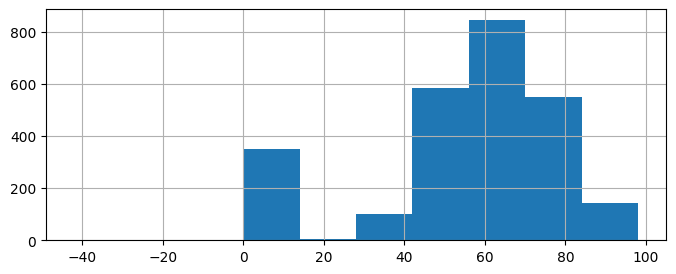

In [36]:
billionaire_df['age'].hist(figsize=(8,3))

<Axes: >

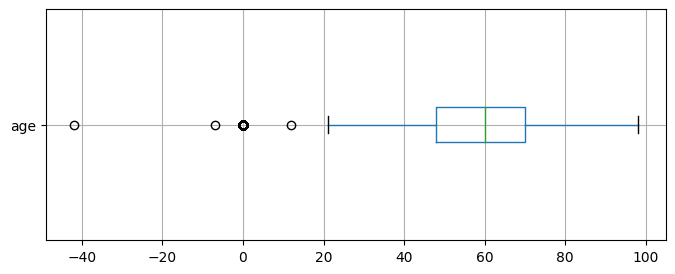

In [37]:
billionaire_df.boxplot(['age'],figsize=(8,3),vert=False)

In [38]:
import pandas as pd


# Calculate the quartiles for the 'age' column
Q1 = billionaire_df['age'].quantile(0.25)
Q3 = billionaire_df['age'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate lower and upper fences for the 'age' column
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Display the results
print(f"First Quartile (Q1): {Q1}")
print(f"Third Quartile (Q3): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")

First Quartile (Q1): 48.0
Third Quartile (Q3): 70.0
Interquartile Range (IQR): 22.0
Lower Fence: 15.0
Upper Fence: 103.0


In [39]:
# calculate median age
median_age = np.median(billionaire_df['age'])

# replace outliers with median age
billionaire_df.loc[billionaire_df['age'] < 20, 'age'] = median_age

In [40]:
billionaire_df.head(10)

,name,gender,citizenship,company_sector,age,net_worth_billion,wealth_type,wealth_source,wealth_inherited,was_founder
0,Bill Gates,male,United States,Software,40,18.5,founder non-finance,New Sectors,not inherited,True
1,Bill Gates,male,United States,Software,45,58.7,founder non-finance,New Sectors,not inherited,True
2,Bill Gates,male,United States,Software,58,76.0,founder non-finance,New Sectors,not inherited,True
3,Warren Buffett,male,United States,Finance,65,15.0,founder non-finance,Traded Sectors,not inherited,True
4,Warren Buffett,male,United States,Finance,70,32.3,founder non-finance,Traded Sectors,not inherited,True
5,Carlos Slim Helu,male,Mexico,Communications,74,72.0,privatized and resources,Non-Traded Sectors,not inherited,True
6,Oeri Hoffman and Sacher,married couple,Switzerland,pharmaceuticals,60,13.1,inherited,New Sectors,3rd generation,True
7,Paul Allen,male,United States,technology,48,30.4,founder non-finance,New Sectors,not inherited,True
8,Amancio Ortega,male,Spain,Fashion,77,64.0,founder non-finance,Non-Traded Sectors,not inherited,True
9,Lee Shau Kee,male,Hong Kong,real estate,68,12.7,self-made finance,Financial,not inherited,True


<Axes: >

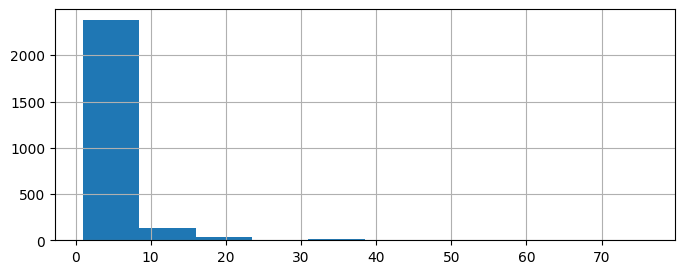

In [41]:
billionaire_df['net_worth_billion'].hist(figsize=(8,3))

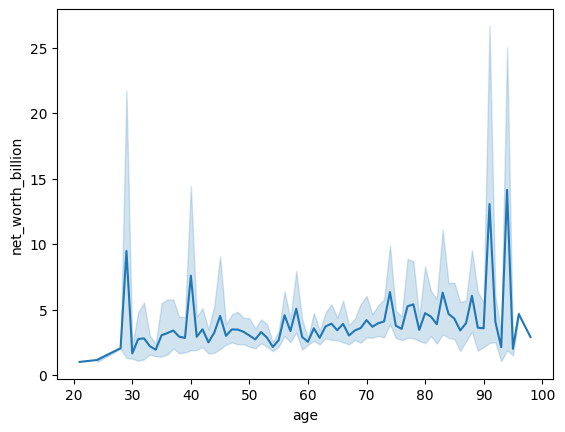

In [42]:
# Line plot
sns.lineplot(x='age', y='net_worth_billion', data=billionaire_df)

# show the plot
plt.show()

**Data Visualization and answering Research Questions**

1.What are the top 10 countries with the highest number of billionaires?

In [43]:
# Group the data by "location. citizenship" and count the number of billionaires in each country
country_counts = billionaire_df.groupby("citizenship")["name"].count()

# Sort the result in descending order to get the top 10 countries with the highest number of billionaires
top_10_countries = country_counts.sort_values(ascending=False)[:10]

print(top_10_countries)

citizenship
United States     903
China             153
Germany           145
Russia            119
Japan              92
Brazil             80
Hong Kong          77
France             69
United Kingdom     64
India              63
Name: name, dtype: int64


<ipython-input-44-24a50bd20afb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='magma', ax=ax)


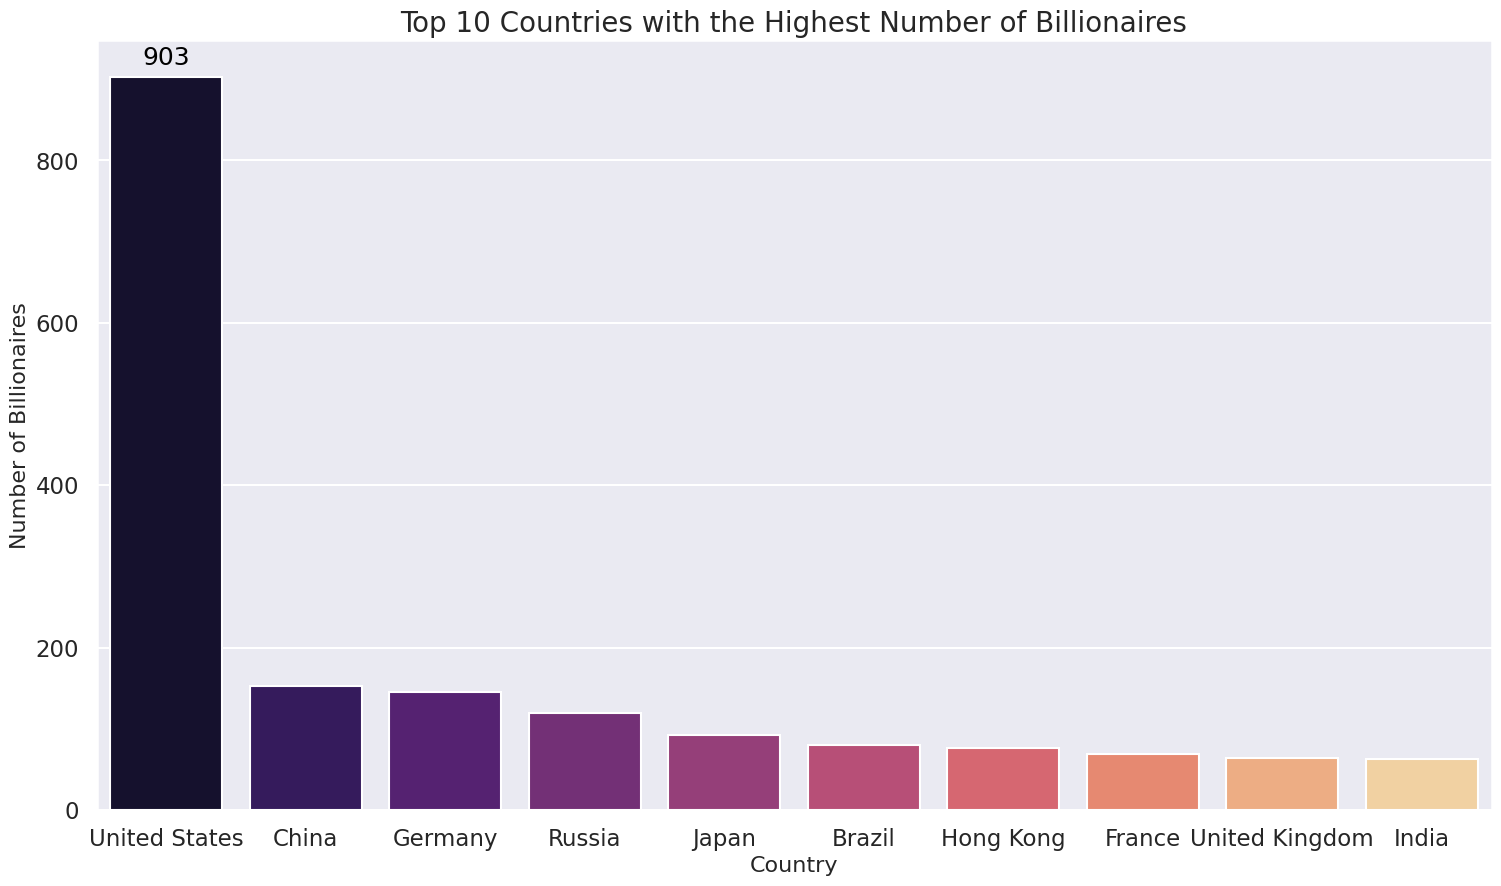

In [44]:

# Set the Seaborn style and context
sns.set(style='darkgrid', context='talk')

# Create a bar plot
fig, ax = plt.subplots(figsize=(18, 10))  # set the figure size
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='magma', ax=ax)

# Add text labels on the bars
for i, bar in enumerate(ax.containers[0]):
    ax.annotate(f"{top_10_countries.values[i]:,}",
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', color='black')

# Set the plot title and labels
plt.title('Top 10 Countries with the Highest Number of Billionaires', fontsize=20)
plt.ylabel('Number of Billionaires', fontsize=16)
plt.xlabel('Country', fontsize=16)

# Show the plot
plt.show()

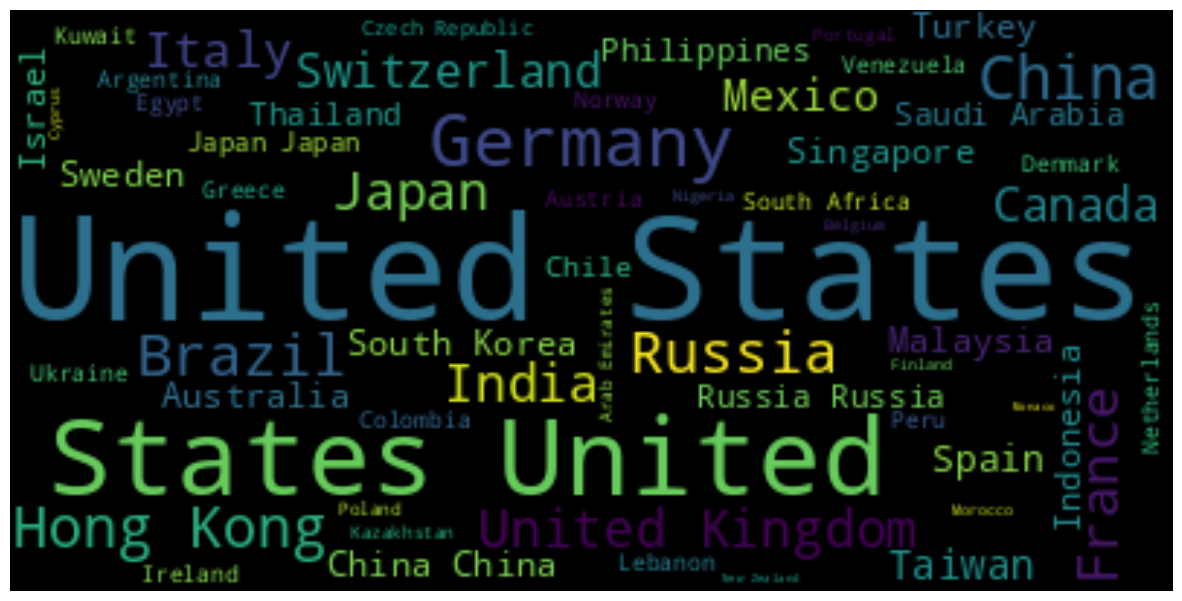

In [45]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
text = " ".join(i for i in billionaire_df.citizenship)

plt.figure( figsize=(15,10))
wordcloud = WordCloud(
                      stopwords=stopwords,
                      max_words=200,
                      max_font_size=50,
                      random_state=50
                     ).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');
plt.show();

2.What are the most succesfull sectors/Industries?

In [46]:
# Group the data by sector and sum the net worth
sector_worth = billionaire_df.groupby('company_sector')['net_worth_billion'].sum()

# Sort the result in descending order
sector_worth = sector_worth.sort_values(ascending=False)[:10]

# Print the top 10 most successful sectors
print(sector_worth.head(10))

company_sector
real estate        635.2
media              486.6
retail             475.7
technology         263.6
banking            245.2
oil                215.2
construction       213.6
pharmaceuticals    203.9
groceries          178.9
hedge funds        178.2
Name: net_worth_billion, dtype: float64


In [47]:
# Group by industry and count the number of billionaires
sector_counts = billionaire_df.groupby("company_sector")["name"].count()

# Sort the sectors by the number of billionaires in descending order
top_sectors = sector_counts.sort_values(ascending=False)[:10]

# Print the top 10 sectors with the highest number of billionaires
print(top_sectors)

company_sector
real estate        187
retail             118
media              117
construction        96
banking             93
pharmaceuticals     74
oil                 74
software            67
hedge funds         50
technology          36
Name: name, dtype: int64


<ipython-input-48-5488bb39b0ef>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sectors.index, y=top_sectors.values, palette='magma', ax=ax)


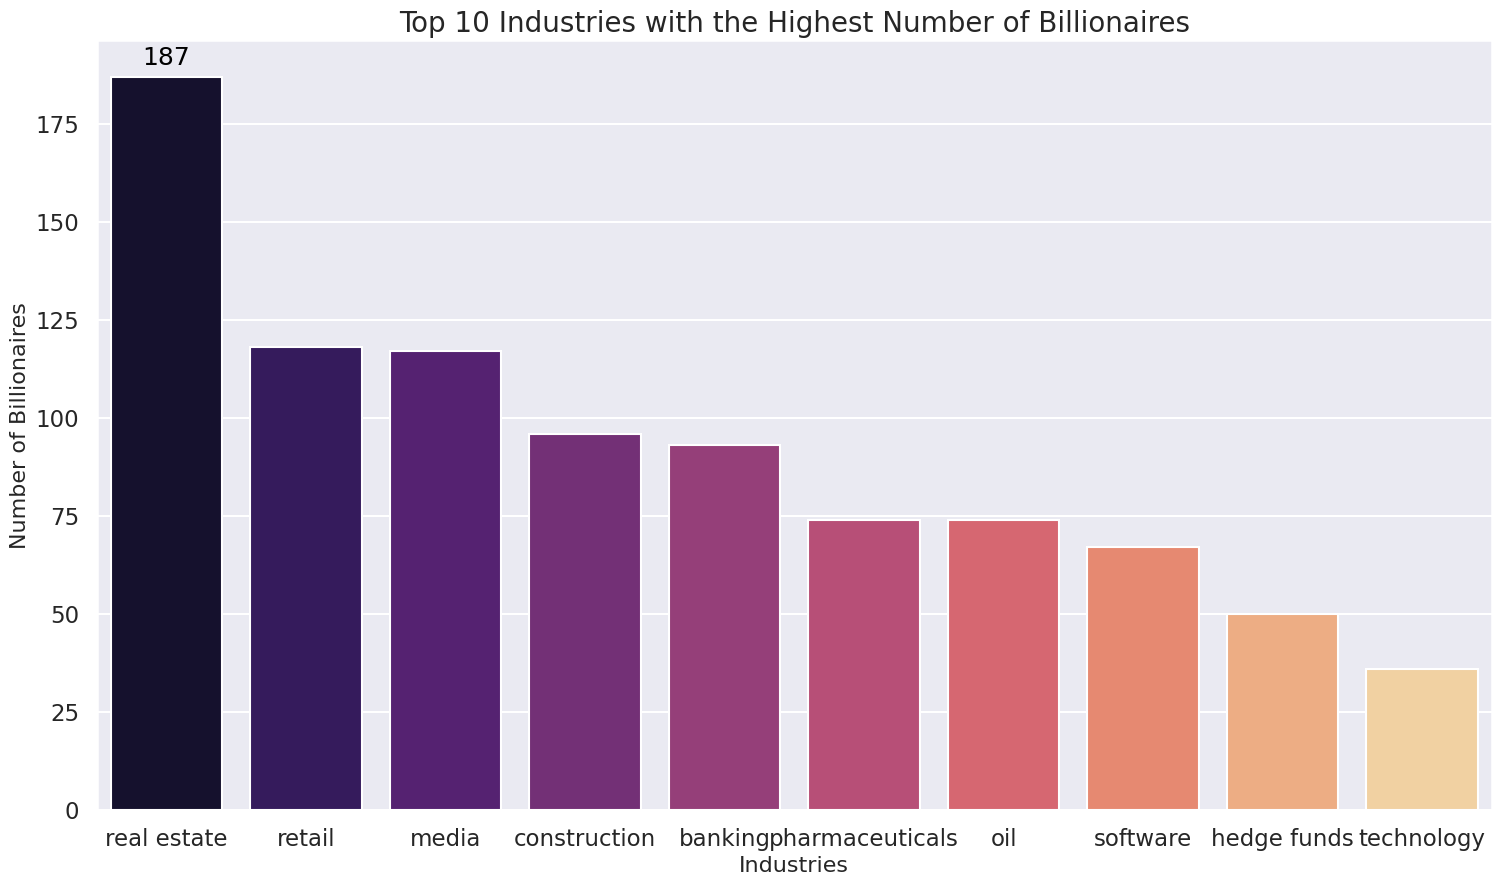

In [48]:
# Set the Seaborn style and context
sns.set(style='darkgrid', context='talk')

# Create a bar plot
fig, ax = plt.subplots(figsize=(18, 10))  # set the figure size
sns.barplot(x=top_sectors.index, y=top_sectors.values, palette='magma', ax=ax)

# Add text labels on the bars
for i, bar in enumerate(ax.containers[0]):
    ax.annotate(f"{top_sectors.values[i]:,}",
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', color='black')

# Set the plot title and labels
plt.title('Top 10 Industries with the Highest Number of Billionaires', fontsize=20)
plt.ylabel('Number of Billionaires', fontsize=16)
plt.xlabel('Industries', fontsize=16)

# Show the plot
plt.show()

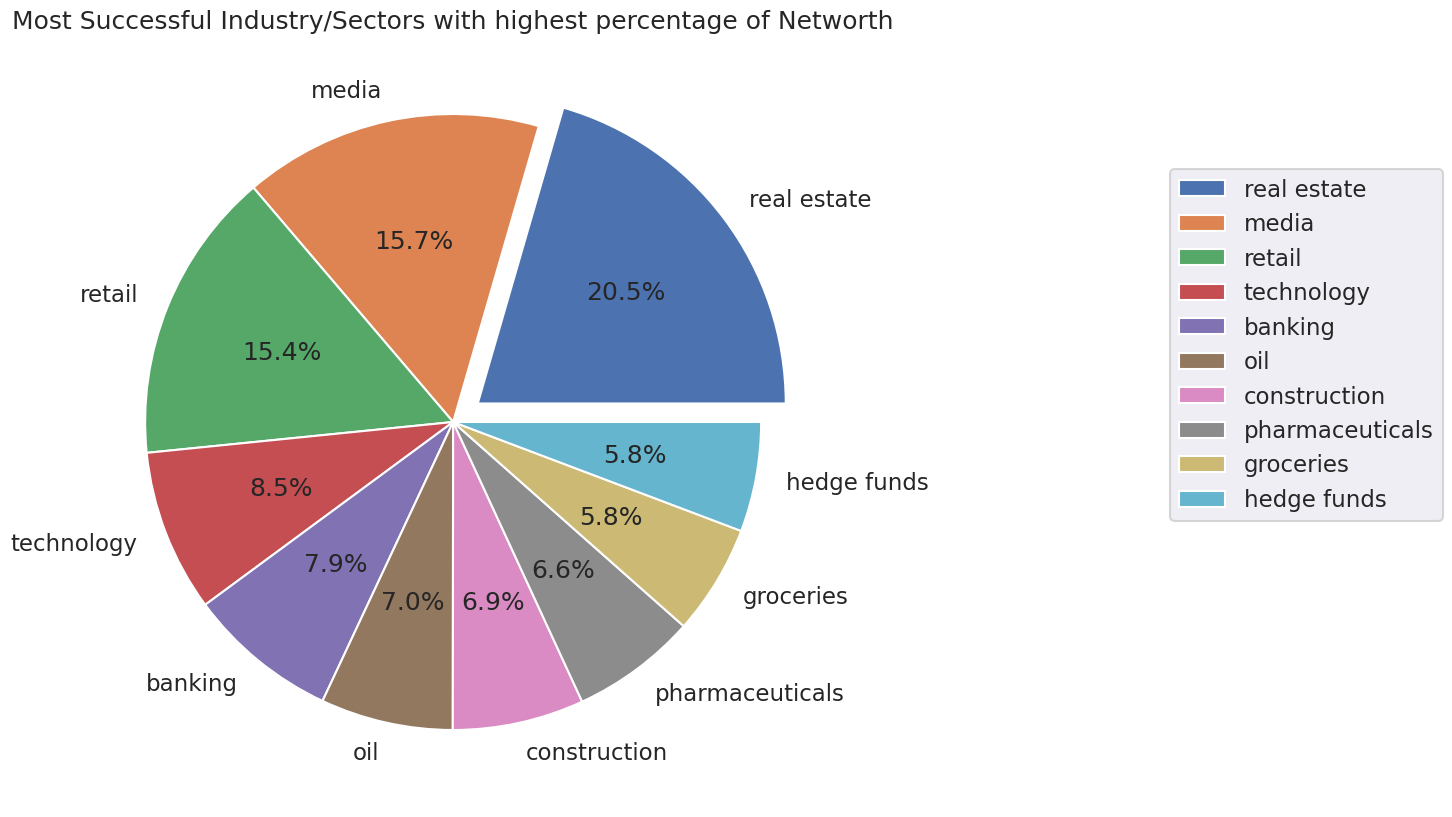

In [49]:
# create a pie chart with percentages
explode = [0.1, 0, 0, 0, 0,0,0,0,0,0]
plt.figure(figsize=(10,10))
plt.pie(sector_worth, labels=sector_worth.index,explode=explode,autopct='%1.1f%%')
plt.title('Most Successful Industry/Sectors with highest percentage of Networth')
plt.legend(loc='center right', bbox_to_anchor=(1.8, 0.6))
plt.show()

3.What are the main industries with the highest number of women billionaires?

In [50]:
women_billionaires = billionaire_df[billionaire_df['gender'] == 'female']
women_billionaires_by_sector = women_billionaires.groupby('company_sector')['name'].count().sort_values(ascending=False)
top_sectors_women = women_billionaires_by_sector.head(10)
print(top_sectors_women)


company_sector
retail              17
media               13
construction        12
soup                10
real estate         10
banking              8
electronics          5
medical supplies     5
pharmaceuticals      5
beer                 5
Name: name, dtype: int64


<ipython-input-51-e462828a352d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sectors_women.index, y=top_sectors_women.values, palette='magma')


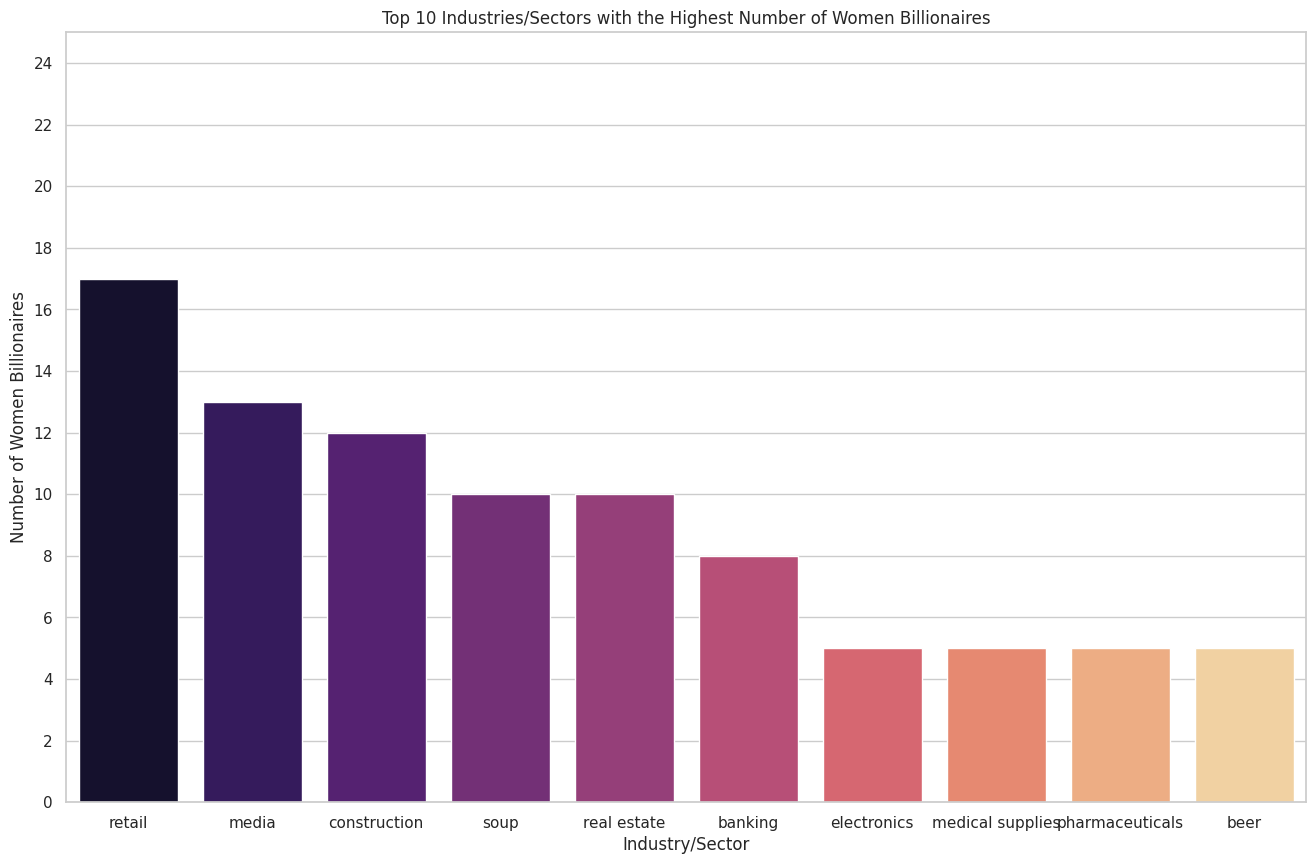

In [51]:
# Set Seaborn style and context
sns.set(style='whitegrid', context='talk')

# Create a new figure and set its size
fig = plt.figure(figsize=(16, 10))
# Create a bar plot using Seaborn
sns.set(style='whitegrid')
sns.barplot(x=top_sectors_women.index, y=top_sectors_women.values, palette='magma')

plt.ylim(0, 25)
plt.yticks(range(0,26, 2))
# Set the plot title and labels
plt.title('Top 10 Industries/Sectors with the Highest Number of Women Billionaires')
plt.ylabel('Number of Women Billionaires')
plt.xlabel('Industry/Sector')

# Show the plot
plt.show()

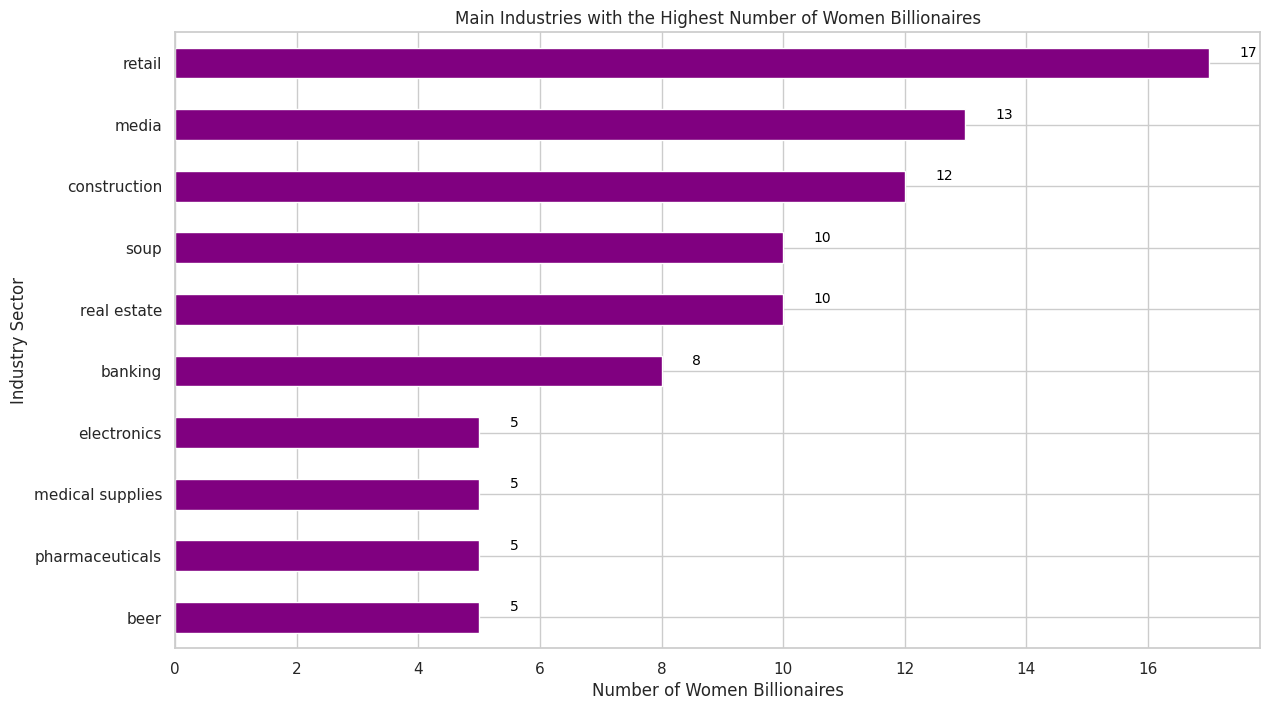

In [52]:
# Plot horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 8))
top_sectors_women.plot(kind='barh', color='purple')
ax.set_title('Main Industries with the Highest Number of Women Billionaires')
ax.set_xlabel('Number of Women Billionaires')
ax.set_ylabel('Industry Sector')
ax.invert_yaxis()

# Add labels to the bars
for i, v in enumerate(top_sectors_women):
    ax.text(v + 0.5, i - 0.1, str(v), color='black', fontsize=10)

plt.show()

4.What age range represents the highest and lowest number of billionaires?

In [53]:
min_value = billionaire_df['age'].min()
max_value = billionaire_df['age'].max()
print(min_value)
print(max_value)

21
98


In [54]:
# Bin the ages into different age groups
age_bins = [10,30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
billionaire_df['age_group'] = pd.cut(billionaire_df['age'], bins=age_bins, labels=age_labels)



<ipython-input-54-8bbc0bd9d7f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billionaire_df['age_group'] = pd.cut(billionaire_df['age'], bins=age_bins, labels=age_labels)


In [55]:
billionaire_df

,name,gender,citizenship,company_sector,age,net_worth_billion,wealth_type,wealth_source,wealth_inherited,was_founder,age_group
0,Bill Gates,male,United States,Software,40,18.5,founder non-finance,New Sectors,not inherited,True,30-40
1,Bill Gates,male,United States,Software,45,58.7,founder non-finance,New Sectors,not inherited,True,40-50
2,Bill Gates,male,United States,Software,58,76.0,founder non-finance,New Sectors,not inherited,True,50-60
3,Warren Buffett,male,United States,Finance,65,15.0,founder non-finance,Traded Sectors,not inherited,True,60-70
4,Warren Buffett,male,United States,Finance,70,32.3,founder non-finance,Traded Sectors,not inherited,True,60-70
...,...,...,...,...,...,...,...,...,...,...,...
2609,Wu Chung-Yi,male,Taiwan,beverages and food,55,1.0,executive,Traded Sectors,not inherited,True,50-60
2610,Wu Xiong,male,China,infant formula,60,1.0,executive,Traded Sectors,not inherited,True,50-60
2611,Yang Keng,male,China,real estate,53,1.0,self-made finance,Financial,not inherited,True,50-60
2612,Zdenek Bakala,male,Czech Republic,coal,53,1.0,privatized and resources,Resource Related,not inherited,True,50-60


In [56]:
#Number of billionaires in different age group
counts= billionaire_df['age_group'].value_counts()
print(counts)



50-60     918
60-70     590
70-80     413
40-50     351
80-90     198
30-40      76
90-100     22
20-30      13
Name: age_group, dtype: int64


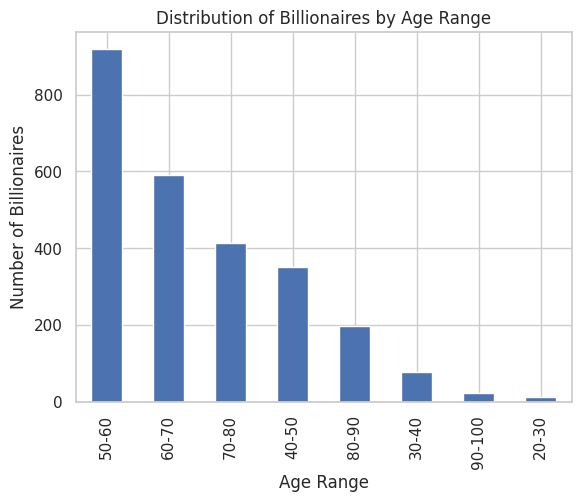

In [57]:
# create a bar plot
billionaire_df['age_group'].value_counts().plot(kind='bar')

# set plot title and axis labels
plt.title('Distribution of Billionaires by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Number of Billionaires')

# show plot
plt.show()


In [58]:
# get an array of unique values in the 'Country' column
unique_countries = billionaire_df['wealth_inherited'].unique()

# print the unique countries
for country in unique_countries:
    print(country)

not inherited
3rd generation
father
spouse/widow
5th generation or longer
4th generation


In [59]:
billionaire_df['Inherited'] = billionaire_df['wealth_inherited'].apply(lambda x: 'Inherited' if 'father' in x.lower() or 'spouse/widow' in x.lower() or '3rd generation' in x.lower() or '4th generation' in x.lower() or '5th generation or longer' in x.lower() else 'Not Inherited')


<ipython-input-59-7ea4b5c527f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billionaire_df['Inherited'] = billionaire_df['wealth_inherited'].apply(lambda x: 'Inherited' if 'father' in x.lower() or 'spouse/widow' in x.lower() or '3rd generation' in x.lower() or '4th generation' in x.lower() or '5th generation or longer' in x.lower() else 'Not Inherited')


In [60]:
billionaire_df.head(10)

,name,gender,citizenship,company_sector,age,net_worth_billion,wealth_type,wealth_source,wealth_inherited,was_founder,age_group,Inherited
0,Bill Gates,male,United States,Software,40,18.5,founder non-finance,New Sectors,not inherited,True,30-40,Not Inherited
1,Bill Gates,male,United States,Software,45,58.7,founder non-finance,New Sectors,not inherited,True,40-50,Not Inherited
2,Bill Gates,male,United States,Software,58,76.0,founder non-finance,New Sectors,not inherited,True,50-60,Not Inherited
3,Warren Buffett,male,United States,Finance,65,15.0,founder non-finance,Traded Sectors,not inherited,True,60-70,Not Inherited
4,Warren Buffett,male,United States,Finance,70,32.3,founder non-finance,Traded Sectors,not inherited,True,60-70,Not Inherited
5,Carlos Slim Helu,male,Mexico,Communications,74,72.0,privatized and resources,Non-Traded Sectors,not inherited,True,70-80,Not Inherited
6,Oeri Hoffman and Sacher,married couple,Switzerland,pharmaceuticals,60,13.1,inherited,New Sectors,3rd generation,True,50-60,Inherited
7,Paul Allen,male,United States,technology,48,30.4,founder non-finance,New Sectors,not inherited,True,40-50,Not Inherited
8,Amancio Ortega,male,Spain,Fashion,77,64.0,founder non-finance,Non-Traded Sectors,not inherited,True,70-80,Not Inherited
9,Lee Shau Kee,male,Hong Kong,real estate,68,12.7,self-made finance,Financial,not inherited,True,60-70,Not Inherited


In [61]:
inherited_wealth = billionaire_df.groupby('Inherited')['net_worth_billion'].mean()
print(inherited_wealth)


Inherited
Inherited        3.765904
Not Inherited    3.426458
Name: net_worth_billion, dtype: float64


In [62]:
# create an interactive scatter plot to show the correlation between "NetWorth" and "Inheritance" columns
fig = px.scatter(billionaire_df, x='wealth_inherited', y='net_worth_billion', hover_name='name', color='gender')

# set the axis labels and title
fig.update_layout(xaxis_title='Inheritance', yaxis_title='NetWorth', title='Correlation between Inheritance and NetWorth')

# show the plot
fig.show()

In [63]:
billionaire_df['age_group']

0       30-40
1       40-50
2       50-60
3       60-70
4       60-70
        ...  
2609    50-60
2610    50-60
2611    50-60
2612    50-60
2613    40-50
Name: age_group, Length: 2581, dtype: category
Categories (8, object): ['20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80' < '80-90' < '90-100']

In [64]:
net_worth_by_age = billionaire_df.groupby('age_group')['net_worth_billion'].sum()

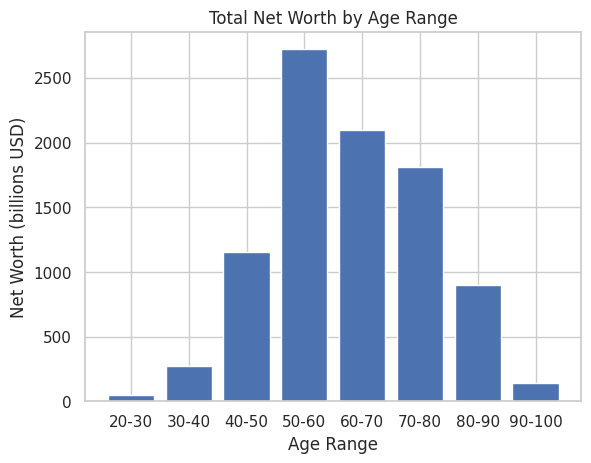

In [65]:
plt.bar(net_worth_by_age.index.astype(str), net_worth_by_age)
plt.xlabel('Age Range')
plt.ylabel('Net Worth (billions USD)')
plt.title('Total Net Worth by Age Range')
plt.show()